In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

from operator import itemgetter
from itertools import groupby

import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.Chrome()  # Optional argument, if not specified will search path.
driver.get('http://www.google.com/xhtml');
time.sleep(5) # Let the user actually see something!
search_box = driver.find_element_by_name('q')
search_box.send_keys('ChromeDriver')
search_box.submit()
time.sleep(5) # Let the user actually see something!
driver.quit()

results = requests.get('https://iegvu.agribusinessintelligence.informa.com/search#?page=1&iegvu=Coffee;Arabica;Robusta&publication=IEG%20Vu&perPage=50&sortBy=date&sortOrder=desc#searchTop')

results

path_to_chromedriver = '/Users/alexanderschultz/Downloads/chromedriver'
browser = webdriver.Chrome(executable_path = path_to_chromedriver)


browser

browser.get('https://iegvu.agribusinessintelligence.informa.com/search#?page=1&publication=IEG%20Vu;Agrow;IEG%20Policy&iegvu=Coffee&fbzunique=7d82f1d7-2bb1-11e8-b82a-0025907713eb&sortBy=date&sortOrder=desc&perPage=50#searchTop')

html = browser.page_source
soup = BeautifulSoup(html, 'lxml')

In [10]:
day_results = []
results = []
for i in range(1, 184):
    time.sleep(6)
    browser = webdriver.Chrome(executable_path = path_to_chromedriver)

    browser

    #browser.get('https://iegvu.agribusinessintelligence.informa.com/search#?page='+str(i)+'&publication=IEG%20Vu;Agrow;IEG%20Policy&iegvu=Coffee&fbzunique=7d82f1d7-2bb1-11e8-b82a-0025907713eb&sortBy=date&sortOrder=desc&perPage=10#searchTop')
    browser.get('https://iegvu.agribusinessintelligence.informa.com/search#?page='+str(1)+'&iegvu=Coffee;Arabica;Robusta&publication=IEG%20Vu&perPage=50&sortBy=date&sortOrder=desc#searchTop')
    #browser.get('https://iegvu.agribusinessintelligence.informa.com/search#?page=1&iegvu=Coffee;Arabica;Robusta&publication=IEG%20Vu&perPage=50&sortBy=date&sortOrder=desc#searchTop')
    
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')

    articles = soup.find_all(class_='search-result__heading article-preview__headline click-utag ng-binding')

    for items in articles:

        title = items.text
        results.append(title)

    dates = soup.find_all(class_='search-result__pubdate ng-scope')

    for items in dates:

        date = items.text
        day_results.append(date)

TimeoutException: Message: timeout
  (Session info: chrome=65.0.3325.181)
  (Driver info: chromedriver=2.37.543654 (a46b62e9900f5ac48951f8ad68d9e03eded4cc8d),platform=Mac OS X 10.13.3 x86_64)


In [ ]:
print(len(results))
len(day_results)

In [5]:
results

['Futures Review: Coffee moves away from recent lows',
 'Futures Review: Coffee ends narrowly mixed',
 'IEG Vu Prices Briefing: Pigs caught in a trade war; price not right for SMP; pineapple juice nadir',
 'Futures Review: Arabica futures fall to one-month low',
 "Uganda's coffee exports fall marginally in February 2018",
 'Futures Review: Coffee futures settle mixed in low volume',
 'Futures Review: Coffee futures close with fractional losses ',
 'Brazilian coffee prices see moderate fall',
 'Futures Review: Coffee post fractional losses in low volume',
 'Brazilian farmers sell 85% of coffee crop',
 'Futures Review: Coffee rises slightly from low level',
 'US green coffee stocks fell to 13-month low',
 'Futures Review: Arabica hits new 9-month low',
 'Mitsui & Co partners with US fish importer',
 'IEG Vu Prices Briefing: New scandal boosts EU poultry values; 8-month high for corn; dairy buyers’ waiting game ',
 'Cocoa prices soar above coffee and sugar ',
 ' Weekly Review: Coffee awai

In [6]:
day_results


['\n28 Mar 2018\n',
 '\n27 Mar 2018\n',
 '\n26 Mar 2018\n',
 '\n26 Mar 2018\n',
 '\n23 Mar 2018\n',
 '\n23 Mar 2018\n',
 '\n22 Mar 2018\n',
 '\n21 Mar 2018\n',
 '\n21 Mar 2018\n',
 '\n20 Mar 2018\n',
 '\n20 Mar 2018\n',
 '\n19 Mar 2018\n',
 '\n19 Mar 2018\n',
 '\n19 Mar 2018\n',
 '\n19 Mar 2018\n',
 '\n16 Mar 2018\n',
 '\n16 Mar 2018\n',
 '\n16 Mar 2018\n',
 '\n15 Mar 2018\n',
 '\n14 Mar 2018\n',
 '\n14 Mar 2018\n',
 '\n14 Mar 2018\n',
 '\n13 Mar 2018\n',
 '\n12 Mar 2018\n',
 '\n12 Mar 2018\n',
 '\n9 Mar 2018\n',
 '\n9 Mar 2018\n',
 '\n9 Mar 2018\n',
 '\n9 Mar 2018\n',
 '\n9 Mar 2018\n',
 '\n1 Mar 2018\n',
 '\n1 Mar 2018\n',
 '\n1 Mar 2018\n',
 '\n28 Feb 2018\n',
 '\n28 Feb 2018\n',
 '\n28 Feb 2018\n',
 '\n27 Feb 2018\n',
 '\n27 Feb 2018\n',
 '\n26 Feb 2018\n',
 '\n26 Feb 2018\n',
 '\n23 Feb 2018\n',
 '\n23 Feb 2018\n',
 '\n23 Feb 2018\n',
 '\n22 Feb 2018\n',
 '\n22 Feb 2018\n',
 '\n21 Feb 2018\n',
 '\n20 Feb 2018\n',
 '\n19 Feb 2018\n',
 '\n19 Feb 2018\n',
 '\n16 Feb 2018\n',
 '\n16 F

In [7]:
no_dupes = list(set(day_results))

In [8]:
no_dupes = pd.to_datetime(no_dupes, infer_datetime_format=True)
no_dupes = no_dupes.sort_values()
no_dupes = pd.DataFrame(no_dupes)
no_dupes.head()

,0
0,2014-05-28
1,2014-05-29
2,2014-05-30
3,2014-06-02
4,2014-06-03


In [276]:
no_dupes.rename(columns={0:'Date'})
no_dupes.head()

,0
0,2007-01-02
1,2007-01-03
2,2007-01-04
3,2007-01-05
4,2007-01-07


In [199]:
df = pd.DataFrame({'Title': results, 'Date': day_results} )

In [238]:
df.head()
df.tail()

,Date,Title,month,day,year
4902,2007-01-03,MILK PRODUCT PRICES IN EUROPE AND THE US,1,3,2007
4903,2007-01-03,"Milk product prices, Jan 3",1,3,2007
4904,2007-01-03,Starbucks reveals trans fat removal plan,1,3,2007
4905,2007-01-03,Indonesian coffee shipments stable after floods,1,3,2007
4906,2007-01-02,India earns more from higher coffee exports in 2006,1,2,2007


In [153]:
df['month'] = df.Date.map(lambda d: d.month)
df['day'] = df.Date.map(lambda d: d.day)
df['year'] = df.Date.map(lambda d: d.year)

In [176]:
transformed_df = df.groupby(['year', 'month', 'day']).sum().reindex() 

In [ ]:
df['Title'] = df['Title'].map(lambda t: t + " ")

In [221]:
transformed_df.head()

Title
year month day                                                   
2007 1     2    India earns more from higher coffee exports in...
           3    Friesland raises stake in Indonesian subsidiar...
           4    Nymex announces start date for soft commodity ...
           5    India's largest coffee chain extends to Pakistan 
           7    Honduran coffee sales Ugandan coffee funds Soy...
           9    McDonald's coffee to be certified as sustainable 
           10   MILK PRODUCT PRICES IN EUROPE AND THE US Milk ...
           14   Fall in crude sees sugar hit three-month low M...
           15               Coke invests in Australian operation 
           16   World coffee production to fall below demand i...
           17   MILK PRODUCT PRICES IN EUROPE AND THE US Milk ...
           18   Australian investment Nestle to scrutinise its...
           19   Starbucks denies WWF allegations over coffee p...
           21   weather Fight for acreage sends soyabeans high...
           23   Officials from Ethiopia and Starbucks meet in ...
           24   MILK PRODUCT PRICES IN EUROPE AND THE US Monsa...
           28   Louis Dreyfus in Brazil push Selling by elevat...
           29   Indian coffee exports set to rise by over 15% ...
     2     1    trading briefs Taking advantage of amazing dem...
           2    Guatemala reports slump in coffee exports Euro...
           5    Nestle pledges to help improve Vietnam's coffe...
           6    Cameroon uses insecticides to fight caterpilla...
           7    Milk product prices, February 7 Green Mountain...
           9    Kenya Airways begins using Utz Kapeh-cerified ...
           11   Dryness puts cocoa near seven-month highs Viet...
           12   Brazilians to be urged to drink more milk Alpi...
           13   CBK gives more upbeat view of Kenyan coffee ou...
           14   Milk escapes health advertising ruling Milk pr...
           15   CBK sees climb in production Uganda lifts expo...
           16   Starbucks meets with press to dispute Ethiopia...
...                                                           ...
2018 2     8    Vietnam coffee exports rise 43.5%  Futures Rev...
           9    Weekly Review: Coffee plenty soon, less later?...
           12   Brazil's green coffee exports fell 5.1%  Futur...
           13        Futures Review: Coffee futures settle mixed 
           14   Podcast: How will global sugar prices fare in ...
           15   Brazil’s coffee output projected to rise by 22...
           16   Weekly Review: Coffee waits on Brazilian devel...
           19   Futures Review: Arabica coffee drops to 2-mont...
           20   Futures Review: Robusta coffee hits 2-week low...
           21       Futures Review: Robusta end up, Arabica down 
           22    Brazil to export 8% more coffee in 2018 Futur...
           23   Weekly Review: Brazil outlook weighs on coffee...
           26   Futures Review: Coffee prices settle mixed IEG...
           27   Honduran coffee exports lower than expected  F...
           28   Netherlands trades organic food but does not b...
     3     1    Indonesian Sumatra coffee exports take a tumbl...
           2    Weekly Review: Coffee producers struggling to ...
           5    Futures Review: Asian export pace keeps Arabic...
           6    IEG Vu’s February Top 10: Sugar price forecast...
           7    Futures Review: Robusta coffee values still fi...
           8        Futures Review: Robusta prices settle mixed  
           9    Weekly Review: Will coffee get Brazilian lift?...
           12   Futures Review: Arabica coffee prices continue...
           13   Futures Review: Arabica coffee weakens again s...
           14   Brazilian coffee crop weighs on prices Futures...
           15         Futures Review: Coffee prices settle lower 
           16   Cocoa prices soar above coffee and sugar   Wee...
           19   US green coffee stocks fell to 13-month low Fu...
           20   Brazilian farmers 

In [201]:
# def add_date(row):
    
#     row['date'] = "%d-%d-%d" % (row['year'],row['month'],row['day'])
#     return row

# transformed_df.apply(add_date, axis=1)

In [258]:
stacked = transformed_df.stack().reset_index()

In [259]:
stacked.head()

,year,month,day,level_3,0
0,2007,1,2,Title,India earns more from higher coffee exports in 2006
1,2007,1,3,Title,"Friesland raises stake in Indonesian subsidiary MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, Jan 3 Starbucks reveals trans fat removal plan Indonesian coffee shipments stable after floods"
2,2007,1,4,Title,Nymex announces start date for soft commodity futures contracts Nybot mourns loss of president and chief executive Harry Falk
3,2007,1,5,Title,India's largest coffee chain extends to Pakistan
4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soyabean market wrong foots many traders Weather Costa Rican coffee Indian Coffee Board highlights rise in exports Colombia overcomes worst of its coffee crisis


In [260]:
print(stacked.columns)
stacked.shape

Index(['year', 'month', 'day', 'level_3', 0], dtype='object')


(1458, 5)

In [261]:
stacked.rename(columns={0:'Title'},inplace = True)

In [262]:
stacked.head()

,year,month,day,level_3,Title
0,2007,1,2,Title,India earns more from higher coffee exports in 2006
1,2007,1,3,Title,"Friesland raises stake in Indonesian subsidiary MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, Jan 3 Starbucks reveals trans fat removal plan Indonesian coffee shipments stable after floods"
2,2007,1,4,Title,Nymex announces start date for soft commodity futures contracts Nybot mourns loss of president and chief executive Harry Falk
3,2007,1,5,Title,India's largest coffee chain extends to Pakistan
4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soyabean market wrong foots many traders Weather Costa Rican coffee Indian Coffee Board highlights rise in exports Colombia overcomes worst of its coffee crisis


In [272]:
stacked.head()

,year,month,day,level_3,Title
0,2007,1,2,Title,India earns more from higher coffee exports in 2006
1,2007,1,3,Title,"Friesland raises stake in Indonesian subsidiary MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, Jan 3 Starbucks reveals trans fat removal plan Indonesian coffee shipments stable after floods"
2,2007,1,4,Title,Nymex announces start date for soft commodity futures contracts Nybot mourns loss of president and chief executive Harry Falk
3,2007,1,5,Title,India's largest coffee chain extends to Pakistan
4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soyabean market wrong foots many traders Weather Costa Rican coffee Indian Coffee Board highlights rise in exports Colombia overcomes worst of its coffee crisis


In [275]:
stacked.shape

(1458, 5)

In [277]:
no_dupes.shape

(1458, 1)

In [278]:
stacked = stacked.join(no_dupes.reindex(stacked.index, method='nearest'))

In [281]:
stacked.rename(columns={0: 'Date'},inplace=True)

In [287]:
stacked.head()

,year,month,day,level_3,Title,Date
0,2007,1,2,Title,India earns more from higher coffee exports in 2006,2007-01-02
1,2007,1,3,Title,"Friesland raises stake in Indonesian subsidiary MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, Jan 3 Starbucks reveals trans fat removal plan Indonesian coffee shipments stable after floods",2007-01-03
2,2007,1,4,Title,Nymex announces start date for soft commodity futures contracts Nybot mourns loss of president and chief executive Harry Falk,2007-01-04
3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,2007-01-05
4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soyabean market wrong foots many traders Weather Costa Rican coffee Indian Coffee Board highlights rise in exports Colombia overcomes worst of its coffee crisis,2007-01-07


In [289]:
coffee_prices = pd.read_csv('./current_prices.csv')
coffee_prices.head()


,Date,Price
0,1/2/07,1.1506
1,1/3/07,1.1760
2,1/4/07,1.1451
3,1/5/07,1.1506
4,1/8/07,1.1376


In [292]:
coffee_prices['Date'] = pd.to_datetime(coffee_prices['Date'])

In [293]:
coffee_prices.Date.dtype

dtype('<M8[ns]')

In [311]:
coffee_prices.head()

,Date,Price
0,2007-01-02,1.1506
1,2007-01-03,1.1760
2,2007-01-04,1.1451
3,2007-01-05,1.1506
4,2007-01-08,1.1376


In [323]:
coffee_prices.tail()

,Date,Price
2823,2018-03-15,1.1201
2824,2018-03-16,1.1179
2825,2018-03-19,1.1268
2826,2018-03-20,1.1295
2827,2018-03-21,1.1275


In [327]:
merged=pd.merge(stacked,coffee_prices, how='left', left_on="Date", right_on="Date")

merged.head(15)

,year,month,day,level_3,Title,Date,Price
0,2007,1,2,Title,India earns more from higher coffee exports in 2006,2007-01-02,1.1506
1,2007,1,3,Title,"Friesland raises stake in Indonesian subsidiary MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, Jan 3 Starbucks reveals trans fat removal plan Indonesian coffee shipments stable after floods",2007-01-03,1.1760
2,2007,1,4,Title,Nymex announces start date for soft commodity futures contracts Nybot mourns loss of president and chief executive Harry Falk,2007-01-04,1.1451
3,2007,1,5,Title,India's largest coffee chain extends to Pakistan,2007-01-05,1.1506
4,2007,1,7,Title,Honduran coffee sales Ugandan coffee funds Soyabean market wrong foots many traders Weather Costa Rican coffee Indian Coffee Board highlights rise in exports Colombia overcomes worst of its coffee crisis,2007-01-07,NaN
5,2007,1,9,Title,McDonald's coffee to be certified as sustainable,2007-01-09,1.1290
6,2007,1,10,Title,"MILK PRODUCT PRICES IN EUROPE AND THE US Milk product prices, January 10 Peru beats coffee export estimates",2007-01-10,1.1166
7,2007,1,14,Title,Fall in crude sees sugar hit three-month low McDonald's coffee plan Euronext.liffe's options come to the fore New Orleans port still recovering after Katrina Indonesia struggles with rain Peruvian coffee sales hit record Poor weather holds back Nicaraguan exports Entry of Asian producers shapes pepper market,2007-01-14,NaN
8,2007,1,15,Title,Coke invests in Australian operation,2007-01-15,NaN
9,2007,1,16,Title,"World coffee production to fall below demand in 2007/08, ICO says",2007-01-16,1.1364


In [324]:
merged.shape

(1458, 7)

In [325]:
merged.isnull().sum()

year         0
month        0
day          0
level_3      0
Title        0
Date         0
Price      165
dtype: int64

In [330]:
merged = merged.fillna(method='ffill')
merged.isnull().sum()

year       0
month      0
day        0
level_3    0
Title      0
Date       0
Price      0
dtype: int64

In [331]:
merged.Price.dtype

dtype('float64')

In [377]:
working_set = merged.to_csv('working_set.csv')

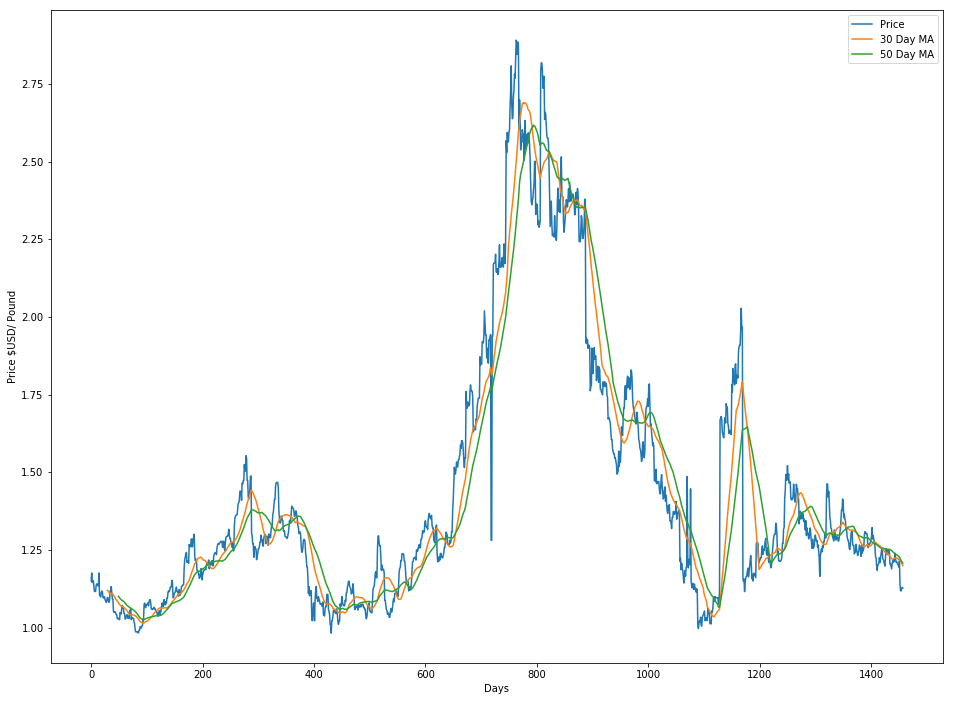

In [339]:
plt.figure(figsize = (16,12))
plt.plot(merged['Price'], label='Price')
plt.plot(merged['Price'].rolling(30).mean(), label='30 Day MA')
plt.plot(merged['Price'].rolling(50).mean(), label = '50 Day MA')
plt.xlabel("Days")
plt.ylabel('Price $USD/ Pound')
plt.legend()

In [344]:
cvec = CountVectorizer()

In [345]:
cvec.fit(merged['Title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [348]:
len(cvec.get_feature_names())

3671

In [350]:
#Lets get rid of the stop words
cvec = CountVectorizer(stop_words='english')
cvec.fit(merged['Title'])
len(cvec.get_feature_names())

3511

In [351]:
# Okay so we only got rid of 160 words, this is good I think. 

In [352]:
dtm = cvec.transform(merged['Title'])

In [353]:
dtm

<1458x3511 sparse matrix of type '<class 'numpy.int64'>'
	with 25434 stored elements in Compressed Sparse Row format>

In [355]:
pd.DataFrame(dtm.toarray(), columns=cvec.get_feature_names())

,000,05,06,07,08,09,10,100,100m,107,11,112,12,124,125,13,134,134m,135m,14,145,15,150,16,17,172,18,19,1bn,1m,1st,20,200,2000,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2020,2025,20m,21,217,22,23,24,25,250,251m,25m,26,27,28,29,2m,2½,30,300,300m,31,32,35,37,37m,38,39,3m,3½,40,41,42,43,43m,44,45,452,45bn,45m,470,485,4bn,4m,4½,50,500m,53,54,55,55m,57,58,589,59,5bn,5m,5½,60,600,63,644,65,70,71,719,72,73,74,7m,80,800,81,82,85,86,8bn,8m,900,9m,9½,able,abroad,absorb,abundant,accelerates,accept,access,accessible,accession,according,accountability,accounts,aceh,achieves,acquire,acquires,acquisition,acquisitions,acreage,act,action,activity,ad,add,added,adding,addition,additional,address,addresses,adds,adecoagro,adjust,adjustment,adm,administration,admit,admits,adopts,adulterating,adulteration,advance,advances,advancing,advantage,adverse,advertising,advocate,affairs,affect,affected,affecting,affects,africa,african,africans,ag,agcelence,agchem,agchems,ageing,agency,agent,agents,aggregator,aggressive,aging,ago,agree,agreement,agrees,agri,agribank,agricultural,agriculture,agrochemical,agronomists,agropur,ahead,ahold,ai,aicc,aid,aids,aim,aiming,aims,airways,ajc,alcoholic,allayed,allegations,alleviate,alliance,alliances,allow,allowed,allows,almonds,alpina,alternative,alzheimer,amazing,amazingly,ambitious,america,american,americas,amid,amidst,ample,amplify,amrit,anacafe,analysis,analyst,analysts,anchor,angolan,announced,announces,annual,anomaly,anticipated,anticipates,anticipating,anuga,ape,apparent,appear,appears,appetite,applies,apply,applying,appoints,appreciation,approach,approaches,approaching,approval,approves,apr,april,aproach,arabica,area,areas,arena,argentine,arla,armajaro,arrests,arrivals,arrived,arrives,arriving,arsenal,art,artificially,asahi,ascent,asean,asia,asian,ask,asking,aspects,assess,assist,assists,associated,associates,association,assurances,atlantic,attack,attempt,attendees,attract,attracting,attractive,attracts,auction,auctions,aug,august,australia,australian,austrian,authorities,average,await,awaits,away,azamax,babs,baby,backlog,backs,bad,baffled,bag,bags,balance,bali,ban,banco,bank,bans,bar,barbara,bargain,barons,barriers,barry,bars,barter,base,based,basf,batter,batters,battle,battles,bay,bayer,bclear,bean,beans,bear,bearish,bears,beat,beats,beef,begin,begins,belgium,believes,belt,benchmark,beneficial,benefit,benefits,benelux,berry,best,bet,bets,better,beverage,beverages,bfja,bid,bides,bids,big,bigger,biggest,bil,billion,bimbo,biodiesel,biofuel,biofuels,bionovelus,biopesticide,bite,black,blacklist,blamed,blames,blanket,blaze,bleak,blend,blends,blistering,blitz,block,blockade,blocks,bloom,blossoms,bm,bn,board,boards,bodes,body,bold,bolster,bolstered,bolsters,bonanza,boom,booming,booms,boost,boosted,boosts,border,borer,borers,bottle,bottled,bottoming,bought,bounce,bounces,bound,bourse,bourses,bpw,braces,branches,brand,branded,brands,brazil,brazilian,brazilians,break,breakers,breakfast,breaks,brew,brewed,brewer,brewery,brewing,brews,brief,briefing,briefs,bright,bring,brings,broad,broker,brokerage,brought,brunt,bsda,bst,bubble,bubbles,buckle,bucks,budget,buffer,build,builds,bulgaria,bulgarian,bulk,bull,bullet,bullish,bullishness,bulls,bump,bumper,buoy,buoyant,buoyed,burger,burned,burner,burst,...,steps,stevia,sticks,stings,stir,stock,stockpile,stockpiles,stockpiling,stocks,stockton,stoke,stokes,stone,stop,stops,store,stores,stories,storm,storms,straight,stranded,strapped,strategic,strategies,strategy,strauss,straw,streamlining,street,strength,strengthen,strengthening,strengthens,strengths,stress,stretched,strike,strikes,strong,stronger,strongly,struggle,struggles,struggling,stuck,study,stunted,sturm,style,stymied,stymies,subdues,subsidiary,subsidies,subsidise,subsidises,subsidy,substantial,substantially,success,sudden,suffer,suffers,sufficiency,sufficient,sugar,sugarcane,suggest,suicide,suitors,sukhoi,sulawesi,sum,sumatra,sumatran,summary,summer,sums,sun,suntory,super,supplier,suppliers,supplies,supply,s

In [372]:
y = merged['Price']
X = merged['Title']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [373]:
cv= CountVectorizer()
lr = LogisticRegression()
tf = TfidfVectorizer()

In [375]:
# pipe = Pipeline([
    
#     ('tf', tf),
#     ('lr', lr)
# ])


# params = {
    
# #     'tf__stop_words': [None, 'english'],
# #     'tf__ngram_range': [(1,1)],
# #     'tf__max_features': [None, 1000],
# #     'tf__binary': [True, False],
# #     'tf__min_df': [1,2,3],
# #     #'tf__max_df': [.5, 1.]

# }
# gs = GridSearchCV(pipe, param_grid=params)
# gs.fit(X_train, y_train)
# print(gs.best_score_)
# gs.best_params_